<a href="https://colab.research.google.com/github/Aleksanderprofic/Machine-Learning/blob/master/LinearRegression/PolynomialRegression/sklearn/sklearn_polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial Linear Regression <a name="plr"></a>

## Data loading and data visualisation <a name="dladv"></a>



### Data loading <a name="dl"></a>

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dataset = pd.read_csv('Position_Salaries.csv')
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


### Data Visualisation

#### Position Level vs Salary

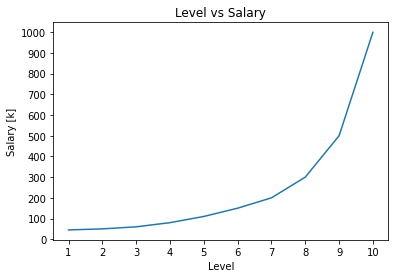

In [24]:
plt.plot(dataset.Level, dataset.Salary / 1000)
plt.title('Level vs Salary')
plt.xlabel('Position Level')
plt.yticks(range(0, 1001, 100))
plt.xticks(range(1, 11))
plt.ylabel('Salary [k]')
plt.show()

In [25]:
dataset.Level.corr(dataset.Salary)

0.8179494074776199

*Strong Correlation between Level and Salary*

## Data preprocessing <a name="dp"></a>

### Extracting dependent and independent variables <a name="edaiv"></a>

In [26]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

## Training and results visualisation

### Training the Linear Regression model on the whole Training set

In [27]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Training the Polynomial Linear Regression model on the whole Training set

In [97]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features = PolynomialFeatures(degree=4)
X_poly = polynomial_features.fit_transform(X)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Visualising the Linear Regression results

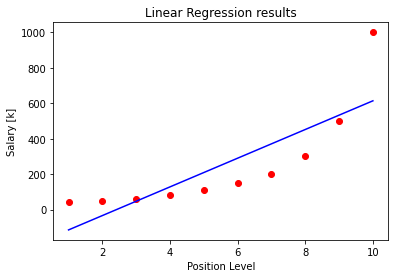

In [98]:
plt.title('Linear Regression results')
plt.xlabel('Position Level')
plt.ylabel('Salary [k]')
plt.scatter(X, y / 1000, color='red')
plt.plot(X, lin_reg.predict(X) / 1000, color='blue')
plt.show()

### Visualising the Polynomial Regression results

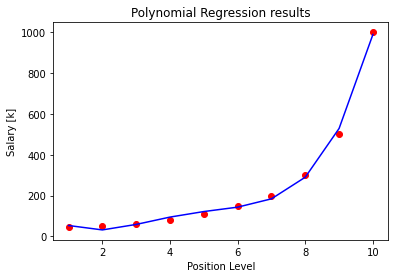

In [99]:
plt.title('Polynomial Regression results')
plt.xlabel('Position Level')
plt.ylabel('Salary [k]')
plt.scatter(X, y / 1000, color='red')
plt.plot(X, poly_reg.predict(X_poly) / 1000, color='blue')
plt.show()

### Visualising the Polynomial Regression results but with smoother curve

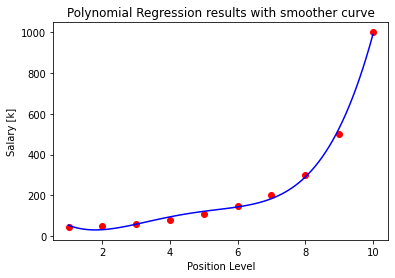

In [100]:
X_grid = np.arange(min(X), max(X) + 0.1, 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.title('Polynomial Regression results with smoother curve')
plt.xlabel('Position Level')
plt.ylabel('Salary [k]')
plt.scatter(X, y / 1000, color='red')
plt.plot(X_grid, poly_reg.predict(polynomial_features.fit_transform(X_grid)) / 1000, color='blue')
plt.show()

### Predicting a new result with Linear Regression

In [101]:
position_level_to_predict = [[6.5]]

lin_reg.predict(position_level_to_predict)

array([330378.78787879])

We can see that Simple Linear Regression is not that accurate in this scenario

### Predicting a new result with Polynomial Regression

In [102]:
poly_reg.predict(polynomial_features.fit_transform(position_level_to_predict))

array([158862.45265155])

Polynomial Regression predicted more accurate result. It is a little bit overfitted but this is good in this case

### The final equation of Polynomial Linear Regression

In [105]:
print(polynomial_features.get_feature_names())
print(poly_reg.coef_)
print(poly_reg.intercept_)

['1', 'x0', 'x0^2', 'x0^3', 'x0^4']
[      0.         -211002.33100292   94765.44289063  -15463.28671331
     890.15151515]
184166.66666719737


The equation of our polynomial regression model is:

$$\textrm{Salary} = -211002.33x + 94765.44x^2 -15463.28x^3 + 890.15x^4 + 184166.66 $$